In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from collections import Counter

In [2]:
df = pd.read_csv('datasets/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We have 0 missing values which is very good. Now let's do EDA.



In [8]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
df[["sex","charges"]].groupby(["sex"], as_index = False).mean().sort_values(by="charges",ascending=False)

,sex,charges
1,male,13956.751178
0,female,12569.578844


In [10]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [11]:
df[["smoker","charges"]].groupby(["smoker"], as_index = False).mean().sort_values(by="charges",ascending=False)

,smoker,charges
1,yes,32050.231832
0,no,8434.268298


C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

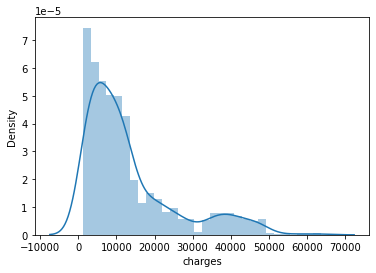

In [12]:
sns.distplot(df['charges'])

<AxesSubplot:xlabel='age', ylabel='charges'>

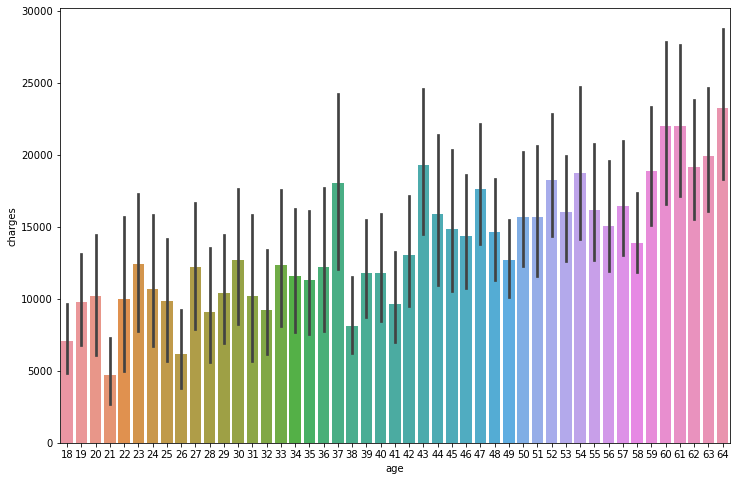

In [13]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'age',y = 'charges', data =df)

<AxesSubplot:xlabel='region', ylabel='charges'>

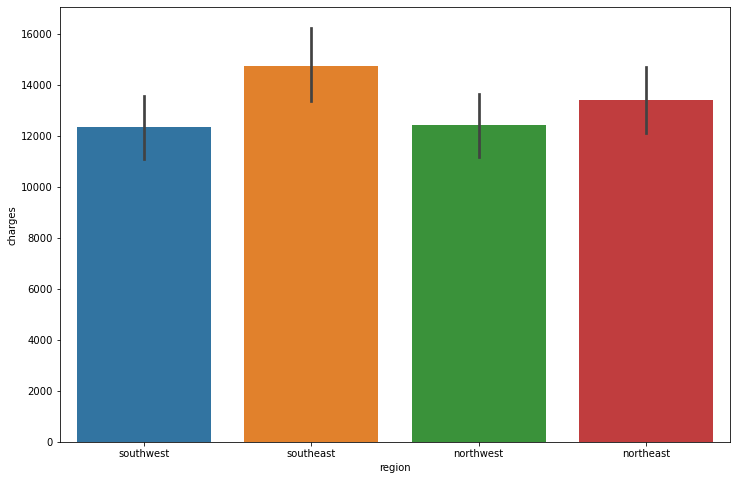

In [14]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'region',y = 'charges', data =df)

<AxesSubplot:xlabel='region', ylabel='charges'>

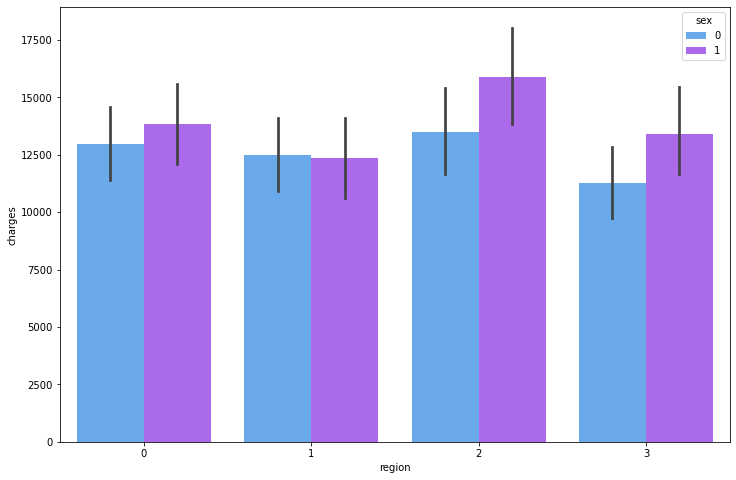

In [50]:
plt.figure(figsize = (12,8))
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

In [15]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [16]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes


age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<AxesSubplot:>

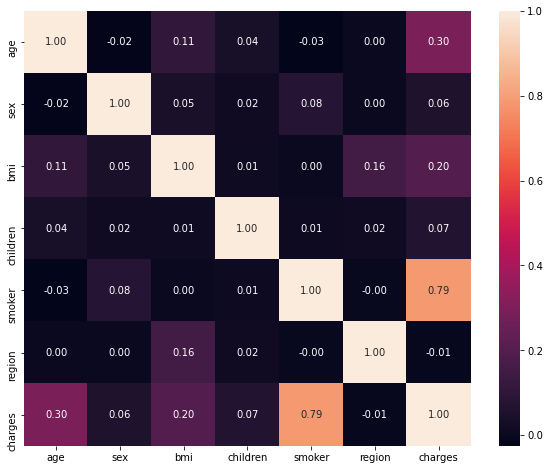

In [18]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot = True,fmt = '.2f')

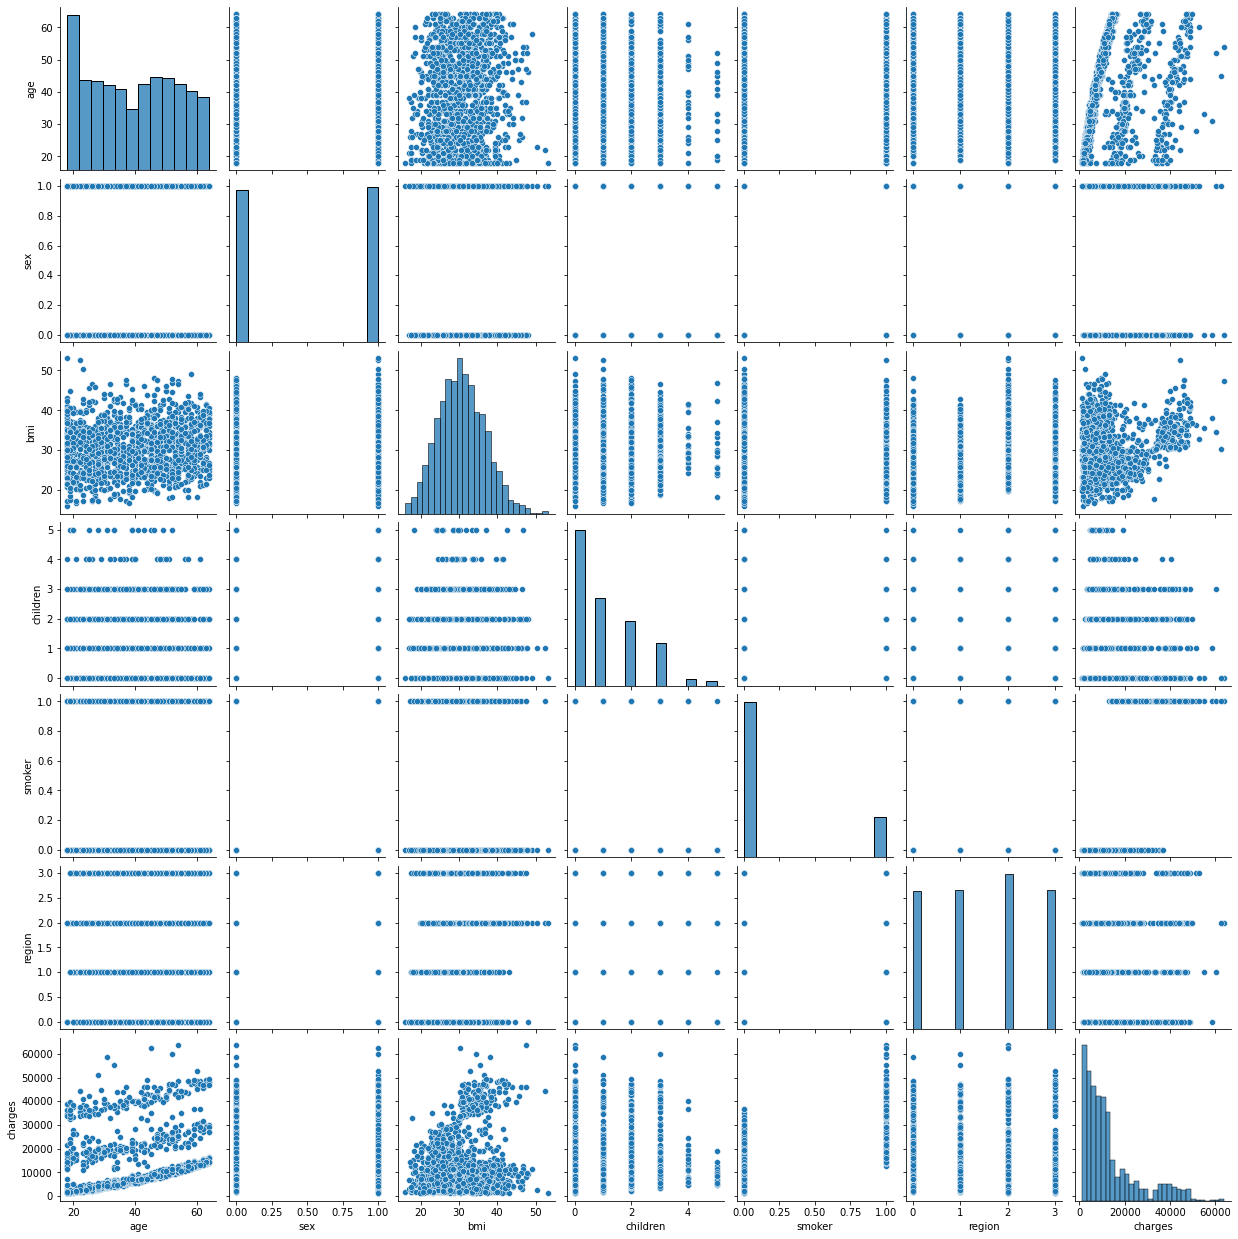

In [20]:
sns.pairplot(df)

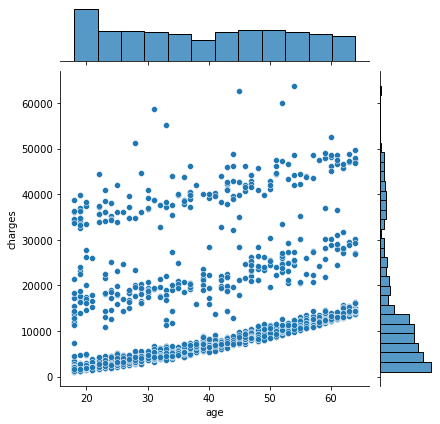

In [21]:
sns.jointplot(y='charges',x='age',data=df,kind='scatter')

In [51]:
X = df[['age','bmi','smoker','region','sex','children']]
y = df['charges']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [54]:
X_train

,age,bmi,smoker,region,sex,children
621,37,34.100,1,3,1,4
194,18,34.430,0,2,1,0
240,23,36.670,1,0,0,2
1168,32,35.200,0,3,1,2
1192,58,32.395,0,0,0,1
...,...,...,...,...,...,...
763,27,26.030,0,0,1,0
835,42,35.970,0,2,1,2
1216,40,25.080,0,2,1,0
559,19,35.530,0,1,1,0


In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [56]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
age,253.991852
bmi,328.402617
smoker,23568.879484
region,-288.508573
sex,-24.324551
children,443.729295


In [57]:
regressor.intercept_

-11661.983908824384

In [58]:
y_pred = regressor.predict(X_train)
y_pred

array([33388.19026849,  3615.42984257, 30678.69073769, ...,
        6132.68612727,  4519.17314626,  2373.39921419])

In [59]:
df1 = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df1

,Actual,Predicted
621,40182.24600,33388.190268
194,1137.46970,3615.429843
240,38511.62830,30678.690738
1168,4670.64000,8023.135810
1192,13019.16105,14151.875606
...,...,...
763,3070.80870,3719.791677
835,7160.33030,11104.432922
1216,5415.66120,6132.686127
559,1646.42970,4519.173146


In [60]:
print(regressor.score(X_test, y_test))

0.7998747145449959


Text(0, 0.5, 'Residuals')

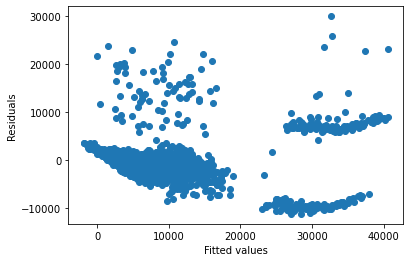

In [61]:
# Validating OLS Assumptions
plt.scatter(y_pred, (y_train-y_pred))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

In [62]:
(y_train-y_pred).mean()

2.3706361899483148e-12

C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

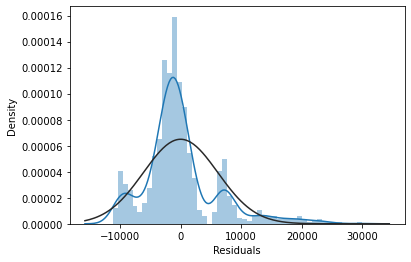

In [63]:
sns.distplot(y_train-y_pred , fit=norm);
plt.xlabel('Residuals')

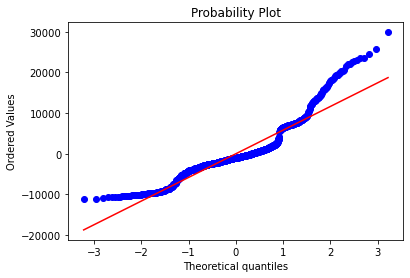

In [64]:
from scipy import stats
stats.probplot(y_train-y_pred, plot=plt)
plt.show()

In [65]:
import statsmodels.api as sm

In [66]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
X_endog = sm.add_constant(X_train)
X_endog1 = sm.add_constant(X_test)


In [67]:
res = sm.OLS(y_train, X_endog)
res.fit()

In [68]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     496.0
Date:                Thu, 01 Apr 2021   Prob (F-statistic):          5.53e-304
Time:                        15:40:05   Log-Likelihood:                -10852.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1063   BIC:                         2.175e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.166e+04   1079.677    -10.801      0.000   -1.38e+04   -9543.444
age          253.9919     13.517     18.791      0.000     227.469     280.514
bmi          328.4026     31.035     10.582      0.000     267.506     389.299
smoker      2.357e+04    468.557     50.301      0.000    2.26e+04    2.45e+04
region      -288.5086    172.599     -1.672      0.095    -627.181      50.164
sex          -24.3246    377.828     -0.064      0.949    -765.697     717.048
children     443.7293    156.293      2.839      0.005     137.051     750.408
==============================================================================
Omnibus:                      255.422   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              614.129
Skew:                           1.273   Prob(JB):                    4.40e-134
Kurtosis:                       5.700   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# Model evaluation metrics - Regression problems

y_pred1 = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 3930.3332739011403
Mean Squared Error: 31845929.134159435
Root Mean Squared Error: 5643.219748880902


In [70]:
# Model evaluation metrics - Regression problems

y_pred1 = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 3930.3332739011403
Mean Squared Error: 31845929.134159435
Root Mean Squared Error: 5643.219748880902


In [71]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [72]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(y_test, y_pred1))

Mean Absolute percentage error: 39.796801994261905


In [73]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(y_train, y_pred))

Mean Absolute percentage error: 43.01085041942161


In [74]:
# Model evaluation metrics - Regression problems

y_pred = regressor.predict(X_train)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


Mean Absolute Error: 4235.3838760320905
Mean Squared Error: 37729580.5098492
Root Mean Squared Error: 6142.440924408569
